DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463419 entries, 0 to 2463418
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   review_topic  object 
 2   review        object 
 3   score         float64
dtypes: float64(1), int64(1), object(2)
memory usage: 75.2+ MB
None

First 5 rows:
   Unnamed: 0  review_topic  \
0           0  ComputerGame   
1           1  ComputerGame   
2           2  ComputerGame   
3           3  ComputerGame   
4           4  ComputerGame   

                                              review  score  
0                            Best 👌 mobile game ever    5.0  
1  It's a really good game I'm going to rate it 1...    5.0  
2  Call of duty mobile is a very interesting game...    5.0  
3  I love the game in it's entirety, the only thi...    3.0  
4  Unplayable size.... its portable. Update 2024 ...    1.0  
Initial shape: (2463419, 4)
Shape after cleaning: (2438576, 4)
   Un

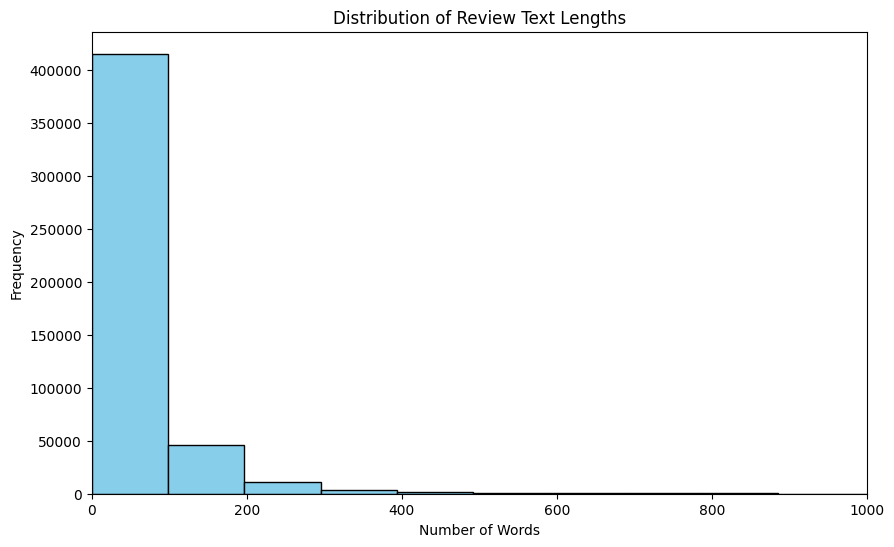

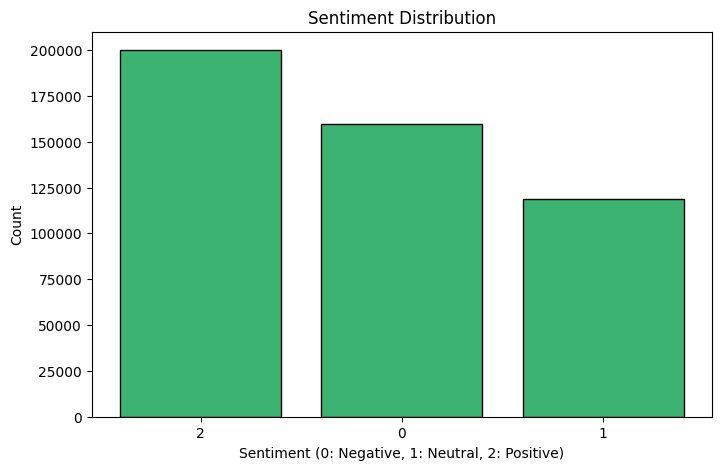


Review Topic Distribution:
review_topic
Course          227845
Food            165763
Products         50964
ComputerGame     20132
Music            13867
Name: count, dtype: int64


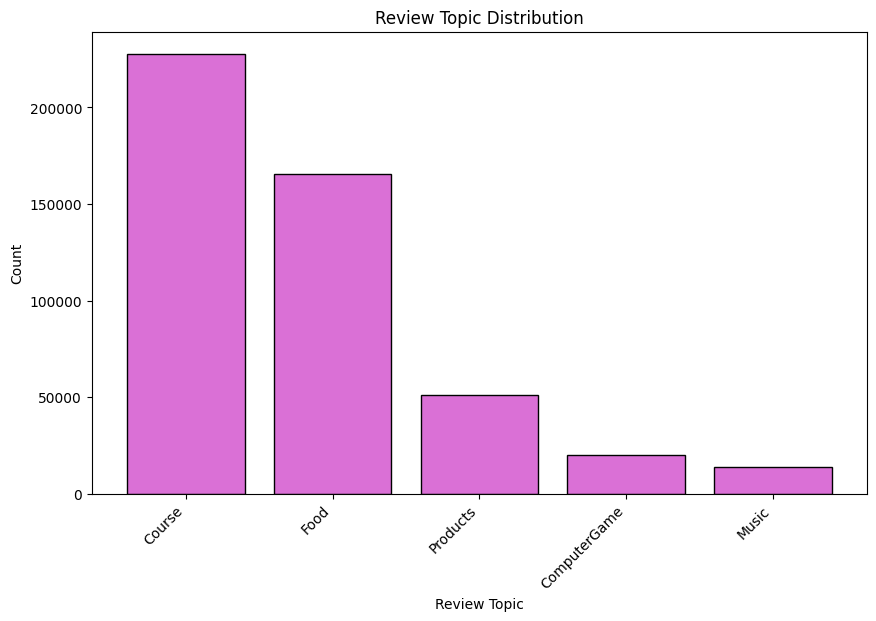

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load dataset
df = pd.read_csv('review.csv')

# Print the structure and summary of the DataFrame
print("DataFrame Info:")
print(df.info())

# Display the first 5 rows of the data
print("\nFirst 5 rows:")
print(df.head())

# Display initial shape of the DataFrame
print("Initial shape:", df.shape)

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Drop rows with missing values in review or score
df.dropna(subset=['review', 'score'], inplace=True)

# Define a cleaning function for the review text
def clean_text(text):
    # Remove leading and trailing whitespace
    text = text.strip()
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the review column
df['review'] = df['review'].apply(clean_text)

# Display the shape of the DataFrame after cleaning
print("Shape after cleaning:", df.shape)

# Display the first few rows of the cleaned DataFrame
print(df.head())

# Create numeric labels from scores
def score_to_label(score):
    if score <= 2:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df['label'] = df['score'].apply(score_to_label)

# Create a DataFrame with only the text and label columns 
bert_df = df[['review', 'label']].rename(columns={'review': 'text'})
print("\nData sample for BERT:")
print(bert_df.head())

# Count the number of instances for each label
label_counts = bert_df['label'].value_counts()
print("Label counts:")
print(label_counts)

# Set the desired sample size for class 2
set_class2_size = 200000

# Undersample class 2 (Positive) to the desired count
df2 = bert_df[bert_df['label'] == 2].sample(n=set_class2_size, random_state=42)

# Keep class 0 (Negative) and class 1 (Neutral) as they are
df0 = bert_df[bert_df['label'] == 0]
df1 = bert_df[bert_df['label'] == 1]

# Combine the datasets and shuffle
balanced_df = pd.concat([df0, df1, df2]).sample(frac=1, random_state=42)
print("\nBalanced label counts:")
print(balanced_df['label'].value_counts())



# EDA
balanced_eda_df = df.loc[balanced_df.index]

# Compute review text length in number of words
balanced_eda_df['review_length'] = balanced_eda_df['review'].apply(lambda x: len(x.split()))

# Plot Distribution of review text lengths 
plt.figure(figsize=(10, 6))
plt.hist(balanced_eda_df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlim(0, 1000)
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Plot Sentiment distribution 
plt.figure(figsize=(8, 5))
plt.bar(balanced_df['label'].value_counts().index.astype(str),
        balanced_df['label'].value_counts().values,
        color='mediumseagreen', edgecolor='black')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0: Negative, 1: Neutral, 2: Positive)")
plt.ylabel("Count")
plt.show()

# Plot Distribution of review_topic 
topic_counts = balanced_eda_df['review_topic'].value_counts()
print("\nReview Topic Distribution:")
print(topic_counts)

plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='orchid', edgecolor='black')
plt.title("Review Topic Distribution")
plt.xlabel("Review Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()
